## Importing necessary Libraries

In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

In [2]:
df = pd.read_csv("Time Series Data_1.csv",encoding="unicode_escape")

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [4]:
df.columns = ["Month","Sales"]

In [5]:
df.shape

(105, 2)

In [6]:
df["Month"] = pd.to_datetime(df["Month"])

In [7]:
df.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

In [8]:
df.set_index("Month",inplace = True)

In [9]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


<AxesSubplot:xlabel='Month'>

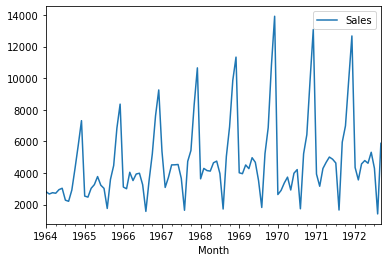

In [10]:
df.plot()

##  Points of analysis(POA)

1. Time Series is not Stationary
2. We Observe seasonality twice
* It falls in the mid of the year.
* Rises in the mid of the year.

3. we see that there is autocorelation in the data.
 

In [11]:
# To find and validate if the data is not stationary by running AD Fuller Test

ad1 = adfuller(df["Sales"])


In [12]:
ad1

(-1.8335930563276248,
 0.363915771660244,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

We only take into account first 4 values
- 1st value is ADF test statistics
- 2nd value is p value
- 3rd value is number of lags/seasonality
- 4th value is number of records without lags

We dont rely on first value i.e ADF test statistics because we have some mathematical formula for this
- we only take into account 2nd ,3rd and 4th value

## Hypothesis of AD Fuller Test

- Null Hypothesis  : Data is non-stationary
- Alternate Hypothesis  : Data is stationary
- In above test run we can see that p-value is greater than 0.05 so we fail to reject null hypothesis i;e Data is Non-stationary 
- In order to make data stationary we are taking first order difference

In [15]:
df["first_difference"] = df["Sales"].shift(1) - df["Sales"]

In [17]:
df.head(10)

,Sales,first_difference
Month,,
1964-01-01,2815,NaN
1964-02-01,2672,143.0
1964-03-01,2755,-83.0
1964-04-01,2721,34.0
1964-05-01,2946,-225.0
1964-06-01,3036,-90.0
1964-07-01,2282,754.0
1964-08-01,2212,70.0
1964-09-01,2922,-710.0


<AxesSubplot:xlabel='Month'>

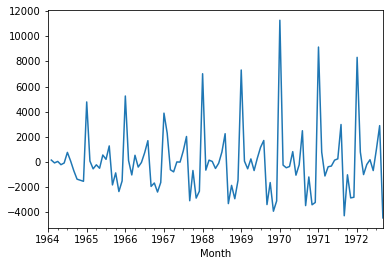

In [19]:
df["first_difference"].plot()

In [20]:
ad2 = adfuller(df["first_difference"].dropna())

In [21]:
ad2

(-7.189896448051015,
 2.5196204473868427e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1466.8267262915892)

p-value is less than 0.05 hence we are accepting alternate hypothesis

Estimation of the p,d,q of the arima model
- p stands for order of the AR model (Eg:AR1,AR2 etc.)
- q stands for order of the MA model(Eg:MA1,MA2 etc.)
- d stands for order of difference eg:1st order,2nd order etc.

In order to find the above values we use ACF,PACF 

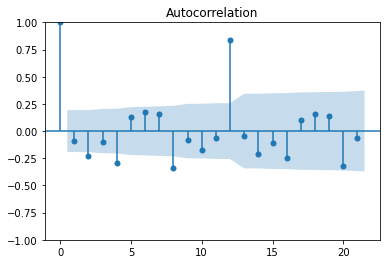

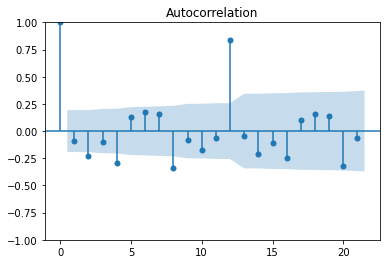

In [23]:
plot_acf(df["first_difference"].dropna())

we consider acf_plot as the best identification method to find out the q value 

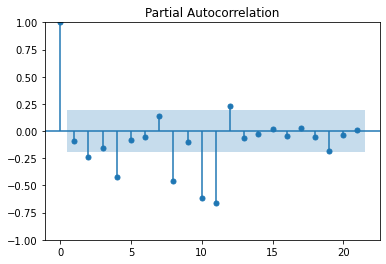

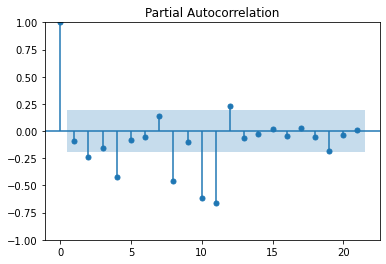

In [25]:
plot_pacf(df["first_difference"].dropna(),method="ywm")

we consider pacf_plot as the best identification method to find out the p value

# Fitting the Model

In [31]:
arima = ARIMA(df["Sales"],order=(1,1,1))

C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
arima = arima.fit()

In [34]:
df["forecast"] = arima.predict(start=95,end=120,dynamic=True)

<AxesSubplot:xlabel='Month'>

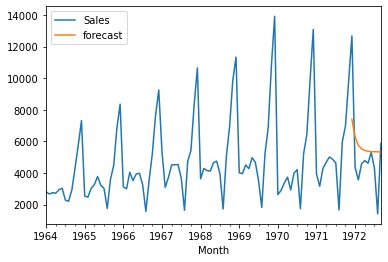

In [35]:
df[["Sales","forecast"]].plot()

As this model is not taking seasonality into consideration so we take into account sarimax model

In [39]:
sarima = SARIMAX(df["Sales"],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
sarima = sarima.fit()

In [48]:
df["seasonal_forecast"] = sarima.predict(start=95,end=120,dynamic=True)

<AxesSubplot:xlabel='Month'>

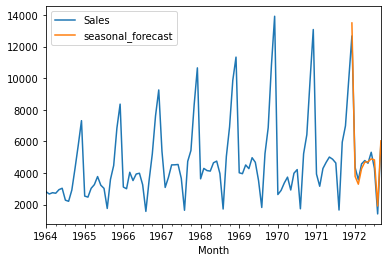

In [49]:
df[["Sales","seasonal_forecast"]].plot()

# Future Predictions

In [51]:
df.index[-9]

Timestamp('1972-01-01 00:00:00')

In [52]:
future_days =[df.index[-9]+pd.tseries.offsets.DateOffset(month=x) for x in range(13)]

In [53]:
future_days[10:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00')]

In [55]:
new_df = pd.DataFrame(index=future_days[10:],columns=df.columns)

In [56]:
new_df

,Sales,first_difference,forecast,seasonal_forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [58]:
new_df = pd.concat([df,new_df])

In [59]:
new_df.tail()

,Sales,first_difference,forecast,seasonal_forecast
1972-08-01,1413,2885.0,1911.734422,1911.734422
1972-09-01,5877,-4464.0,6037.406421,6037.406421
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN


In [60]:
new_df["seasonal_forecast"] = sarima.predict(start=95,end=120,dynamic=True)

In [61]:
new_df.tail()

,Sales,first_difference,forecast,seasonal_forecast
1972-08-01,1413,2885.0,1911.734422,1911.734422
1972-09-01,5877,-4464.0,6037.406421,6037.406421
1972-10-01,NaN,NaN,NaN,7088.092727
1972-11-01,NaN,NaN,NaN,10033.784330
1972-12-01,NaN,NaN,NaN,13571.658138
